A continuación se muestra una matriz de expresión genética:

In [1]:
genexp<-read.csv("practica/GEMatrixFiltered.csv")
head(genexp)


X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal.BC0043N,9167.03,7380.27,8341.82,7944.99,8367.28,7884.22,6209.89,6009.60,9017.07,,13.9187,30.9902,26.8305,30.6226,13.6677,23.7455,29.1401,23.8904,64.3171,25.5825
Cancer.BC0043T,10635.90,11010.80,9859.02,10493.60,10805.70,8507.10,9060.41,9426.21,8674.11,,17.2673,56.3875,16.9442,14.5954,15.2555,19.2764,16.4308,26.5672,53.7115,28.7201
Normal.BC0051N,8015.29,6112.62,8287.92,7360.60,7060.93,8003.40,7140.51,6029.11,7026.17,,26.6429,29.1446,23.8505,32.2064,15.9346,27.4183,21.6383,21.3962,27.9609,45.1721
Cancer.BC0051T,9081.20,8925.35,8276.54,9021.02,8622.68,8925.17,7862.39,6847.31,9651.01,,37.5716,30.0083,20.7826,22.1020,27.5567,26.4899,26.3171,16.6457,41.5037,25.8667
Normal.BC0057N,9006.52,8338.44,7069.53,7909.77,7348.80,7966.06,7120.25,7903.76,7387.18,,36.4167,29.9436,45.3716,31.1614,31.3397,32.0059,29.1746,21.2647,34.7236,35.4706
Cancer.BC0057T,8307.87,7295.69,7048.75,7111.87,6372.62,8056.31,6406.97,6256.54,7098.11,,21.3444,54.1291,37.4840,22.2405,50.9866,26.8458,33.2448,18.3316,24.6310,24.8679


In [2]:
ncol(genexp)
nrow(genexp)


[1] 482

[1] 86

### Limpieza de datos:

* Normalizar
* ¿Existen outliers? Tratamiento de Outliers

In [3]:
#Elimino la primera columna para que el df sea numérico

genNum<-genexp[,-1]
head(genNum)

X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,X200062_s_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
9167.03,7380.27,8341.82,7944.99,8367.28,7884.22,6209.89,6009.60,9017.07,5925.78,,13.9187,30.9902,26.8305,30.6226,13.6677,23.7455,29.1401,23.8904,64.3171,25.5825
10635.90,11010.80,9859.02,10493.60,10805.70,8507.10,9060.41,9426.21,8674.11,9164.38,,17.2673,56.3875,16.9442,14.5954,15.2555,19.2764,16.4308,26.5672,53.7115,28.7201
8015.29,6112.62,8287.92,7360.60,7060.93,8003.40,7140.51,6029.11,7026.17,6157.04,,26.6429,29.1446,23.8505,32.2064,15.9346,27.4183,21.6383,21.3962,27.9609,45.1721
9081.20,8925.35,8276.54,9021.02,8622.68,8925.17,7862.39,6847.31,9651.01,6921.99,,37.5716,30.0083,20.7826,22.1020,27.5567,26.4899,26.3171,16.6457,41.5037,25.8667
9006.52,8338.44,7069.53,7909.77,7348.80,7966.06,7120.25,7903.76,7387.18,6959.41,,36.4167,29.9436,45.3716,31.1614,31.3397,32.0059,29.1746,21.2647,34.7236,35.4706
8307.87,7295.69,7048.75,7111.87,6372.62,8056.31,6406.97,6256.54,7098.11,5688.14,,21.3444,54.1291,37.4840,22.2405,50.9866,26.8458,33.2448,18.3316,24.6310,24.8679


In [4]:
#Eliminamos Outliers


for (i in 1:ncol(genNum)){
    x <- genNum[,i]
    qnt  <- quantile(x, probs=c(.25, .75), na.rm = T)
    caps <- quantile(x, probs=c(.1, .90), na.rm = T)    
    H <- 1.5 * IQR(x, na.rm = T)
    x[x < (qnt[1] - H)] <- caps[1]
    x[x > (qnt[2] + H)] <- caps[2]
    genNum[,i]<-x
}

head(genNum)

X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,X200062_s_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
9167.03,7380.27,8341.82,7944.99,8367.28,7884.22,6209.89,6009.60,9017.07,5925.78,,13.9187,30.9902,26.8305,30.6226,13.6677,23.7455,29.1401,23.8904,64.3171,25.5825
10635.90,11010.80,9859.02,10493.60,10805.70,8507.10,9060.41,9426.21,8674.11,9164.38,,17.2673,56.3875,16.9442,14.5954,15.2555,19.2764,16.4308,26.5672,53.7115,28.7201
8015.29,6112.62,8287.92,7360.60,7060.93,8003.40,7140.51,6029.11,7026.17,6157.04,,26.6429,29.1446,23.8505,32.2064,15.9346,27.4183,21.6383,21.3962,27.9609,45.1721
9081.20,8925.35,8276.54,9021.02,8622.68,8925.17,7862.39,6847.31,9651.01,6921.99,,37.5716,30.0083,20.7826,22.1020,27.5567,26.4899,26.3171,16.6457,41.5037,25.8667
9006.52,8338.44,7069.53,7909.77,7348.80,7966.06,7120.25,7903.76,7387.18,6959.41,,36.4167,29.9436,45.3716,31.1614,31.3397,32.0059,29.1746,21.2647,34.7236,35.4706
8307.87,7295.69,7048.75,7111.87,6372.62,8056.31,6406.97,6256.54,7098.11,5688.14,,21.3444,54.1291,37.4840,22.2405,50.9866,26.8458,33.2448,18.3316,24.6310,24.8679


In [5]:
#Normalización:

library(pracma) 
mnCols<-repmat(colMeans(genNum),n = nrow(genNum),m=1)
sdCols<-repmat(sapply(genNum, sd,na.rm=T),n = nrow(genNum),m=1)
genNum_norm<-(genNum-mnCols)/sdCols

head(genNum_norm)

X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,X200062_s_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
-0.6068573,-1.02303975,-0.5878681,-0.70458754,-0.4870628,-0.5981818,-1.0468240,-1.11345722,-0.14966243,-1.16301307,,-1.0519098,-0.3570187,-0.4327555,-0.3315281,-1.0740217,-0.7123235,-0.4332400,-0.7036338,1.9579427,-0.925993360
-0.1727236,0.04000518,-0.1604944,0.08466742,0.2924008,-0.3718649,-0.1419996,-0.04807841,-0.28395386,-0.00754408,,-0.8638895,1.5746807,-1.0013898,-1.4685446,-0.9898434,-1.0067796,-1.3912294,-0.5379036,1.2107217,-0.634106797
-0.9472612,-1.39421666,-0.6030510,-0.88556176,-0.9046498,-0.5548790,-0.7514226,-1.10737355,-0.92923089,-1.08050403,,-0.3374598,-0.4973937,-0.6041574,-0.2191687,-0.9538405,-0.4703334,-0.9987034,-0.8580586,-0.6035451,0.896399878
-0.6322249,-0.57062937,-0.6062566,-0.37136197,-0.4054218,-0.2199636,-0.5222803,-0.85223967,0.09856682,-0.80758487,,0.2761748,-0.4317013,-0.7806150,-0.9360045,-0.3376869,-0.5315030,-0.6460293,-1.1521789,0.3506172,-0.899554630
-0.6542970,-0.74248078,-0.9462542,-0.71549449,-0.8126294,-0.5684461,-0.7578536,-0.52281389,-0.78787170,-0.79423415,,0.2113284,-0.4366223,0.6336803,-0.2933041,-0.1371286,-0.1680697,-0.4306395,-0.8662002,-0.1270769,-0.006117172
-0.8607874,-1.04780538,-0.9521076,-0.96258861,-1.1246744,-0.5356547,-0.9842660,-1.03645556,-0.90106164,-1.24779836,,-0.6349648,1.4029085,0.1800061,-0.9261789,0.9044652,-0.5080537,-0.1238398,-1.0477989,-0.8381543,-0.992471604


### Parte 1
Realizar un modelo de regresión logistica que sea capaz de, dada la expresión genética de 482 genes realice una predicción de si el tejido es canceroso o no:
* Pintar curva ROC
* Para un umbral de 0 calcular:
 * Precisión
 * F0.5
 * Exactitud
 * Exhaustividad
 * Matriz de confusión
 

In [6]:
#Añado una columna para clasificar las observaciones entre normal y cáncer
genNumWork<-genNum_norm
genNumWork$clasif<-gsub("B.*","",genexp[,1])
#genNum_norm$clasif

In [7]:
genNumWork$clasif.n[genNumWork$clasif=='Normal.'] <- 1
genNumWork$clasif.n[genNumWork$clasif=='Cancer.']<- 0
#genNum_norm$clasif.n

In [8]:
#Dividimos la muestra en train y test

idx<-sample(1:nrow(genNumWork),nrow(genNumWork)*0.7)
gen.train<-genNumWork[idx,]
gen.test<-genNumWork[-idx,]

modellm<-lm(clasif.n~.,data=gen.train)
beta<-modellm$coefficients
#beta

#Convertimos en distribución binomial


model<- glm(clasif.n~.,data=gen.train,family = binomial(link='logit'))
betalg<-model$coefficients

betalg



(Intercept)            X212284_x_at            X212869_x_at 
              -21.72325               103.32155              -221.97531 
           X213614_x_at            X212391_x_at            X201257_x_at 
               52.56348               822.01327              -967.08417 
        AFFX.hum_alu_at            X206559_x_at            X214003_x_at 
             -151.01234              -683.87638              -185.38960 
           X208755_x_at            X200062_s_at            X201429_s_at 
             -168.93038               651.13204               144.43713 
           X213828_x_at            X200717_x_at            X201891_s_at 
              203.74128              -144.21738              -218.60361 
           X213477_x_at            X213080_x_at              X200633_at 
              488.55913               117.14510               -27.33921 
             X200926_at            X200933_x_at            X213583_x_at 
              522.85428              -471.08851              -109.69078 
           X204892_x_at            X201492_s_at            X200095_x_at 
              392.23636              -285.10218              -444.03017 
           X208695_s_at            X207783_x_at               X71933_at 
              351.64175              -144.31365               -32.25221 
           X200016_x_at            X200741_s_at               X396_f_at 
             -530.07544              -429.70437                30.16873 
           X213084_x_at            X200963_x_at            X200099_s_at 
               73.77993               170.00076              -104.59912 
           X213356_x_at            X211542_x_at            X213347_x_at 
              -14.53660              -456.44224               430.64837 
           X201217_x_at            X200032_s_at            X211978_x_at 
              191.75264               157.26302             -2092.14964 
           X201254_x_at            X200817_x_at             X33323_r_at 
               50.62960               -91.51480               -34.66321 
           X211378_x_at            X217740_x_at            X201293_x_at 
             1284.49448               157.38662              1266.46540 
           X211073_x_at            X221607_x_at            X212661_x_at 
              103.60286              -569.03898              -597.89088 
           X208825_x_at            X215076_s_at            X213214_x_at 
              116.58970               155.76505               694.48392 
           X214328_s_at            X212039_x_at            X201033_x_at 
               85.67096               -40.87981               252.44427 
           X211970_x_at            X207243_s_at            X201550_x_at 
             -963.02658              -297.19310              1071.13458 
             X202088_at            X211983_x_at            X200834_s_at 
             -378.14631               109.15476               479.93032 
           X211943_x_at            X202649_x_at            X200763_s_at 
                     NA                      NA                      NA 
           X214749_s_at            X212988_x_at            X211765_x_at 
                     NA                      NA                      NA 
           X210646_x_at              X208718_at            X201553_s_at 
                     NA                      NA                      NA 
           X200092_s_at            X208856_x_at            X219071_x_at 
                     NA                      NA                      NA 
           X200809_x_at            X208834_x_at              X200614_at 
                     NA                      NA                      NA 
           X200650_s_at            X211720_x_at            X200088_x_at 
                     NA                      NA                      NA 
           X213414_s_at            X209134_s_at              X201994_at 
                     NA                      NA                      NA 
           X212790_x_at            X201049_s_at            X200958_s_a

In [9]:
#Matriz de Confusión

M<-matrix(rep(0,4),ncol = 2)
y_est=factor(ifelse(predict(model,gen.test)< 0,0,1),labels=c(1,0))

idx_normal<-gen.test$clasif=="Normal."
idx_cancer <-gen.test$clasif=="Cancer."


M[1,1]=sum(y_est[idx_normal]==1)
M[1,2]=sum(y_est[idx_cancer]==1)
M[2,1]=sum(y_est[idx_normal]==0)
M[2,2]=sum(y_est[idx_cancer]==0)
M




Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

6,9
7,4


In [10]:
paste("Precision:", M[1,1]/(M[1,2]+M[1,1]))
paste("Exhausitivad:", M[1,1]/(M[2,1]+M[1,1]))
paste("Exactitud:",(M[1,1]+M[2,2])/sum(sum(M)))
p<-M[1,1]/(M[1,2]+M[1,1])
e<-M[1,1]/(M[2,1]+M[1,1])
b<-0.5
(1+b^2)*(p*e)/(b^2*p+e)

[1] "Precision: 0.4"

[1] "Exhausitivad: 0.461538461538462"

[1] "Exactitud: 0.384615384615385"

[1] 0.4109589

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"Removed 1 rows containing missing values (geom_path)."

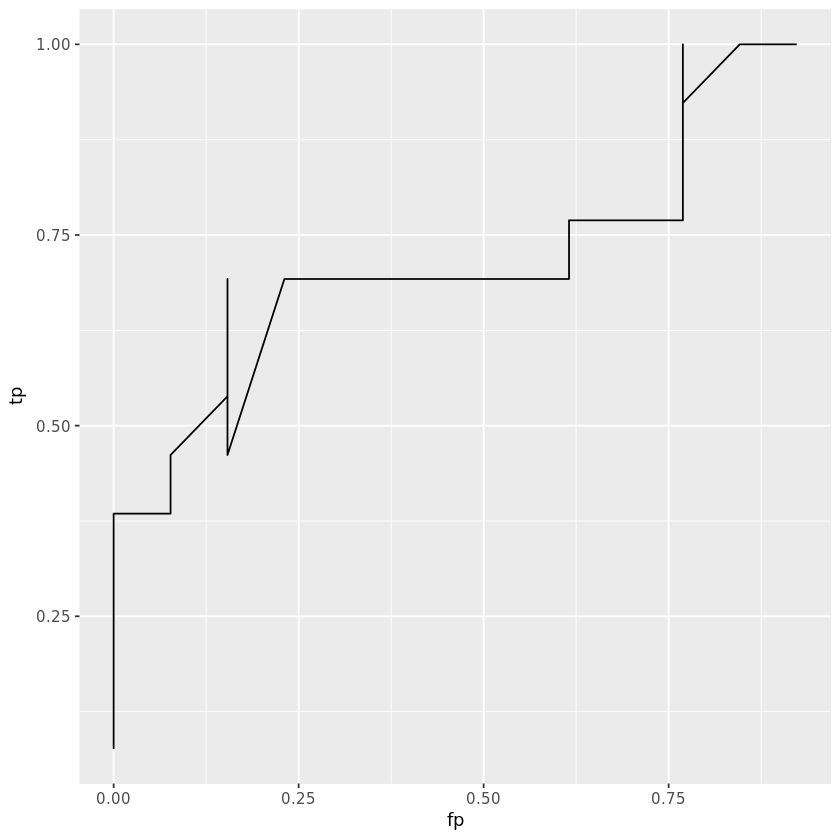

In [11]:
calctp_fp<-function(y_predict,y_real,th){
    y_est<-ifelse(y_predict<th,0,1)
    idx_normal<-y_real==1
    idx_cancer <-y_real==0

    M<-table(y_est,gen.test$clasif.n)
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}

y_predict<-predict(model,gen.test)
dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="model1")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,gen.test$clasif.n,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}

dfROC<-dfROC[order(dfROC$fp),]

library(ggplot2)
ggplot(data=dfROC,aes(x=fp,y=tp))+geom_path()

### Parte 2

Realizar clusterización por k-means y uno basado en áboles (dendrograma). ¿Cual sería el número de clusters óptimo?  ¿Puedes identificar algún cluster interesante?

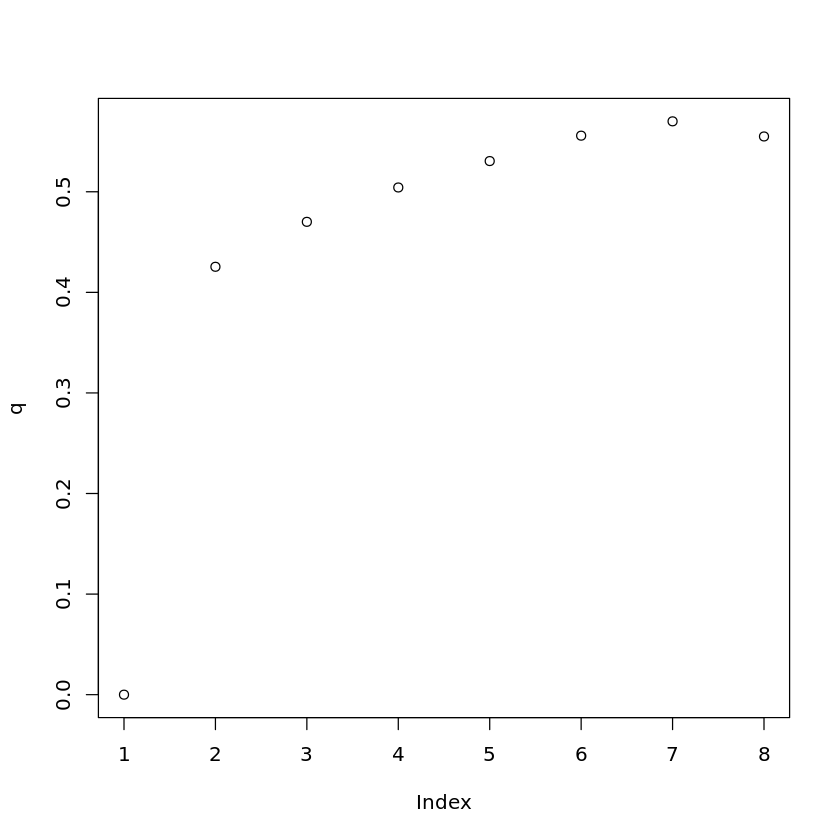

In [12]:
#Número óptimo

q<-c()
for (k in 1:8){
    myclust<-kmeans(genNum_norm,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

In [13]:
myclust<-kmeans(genNum_norm,4)
print("Los centroides son:")
myclust$centers
summary(myclust)


[1] "Los centroides son:"


,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,X200062_s_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
1,0.6136003,0.5969953,0.7010192,0.5752491,0.5751359,0.8105741,0.6465649,0.5430470,0.3996379,0.8676505,,0.41716895,-0.17188634,1.2472478,1.1981066,1.1411923,1.1421840,0.9464791,0.5729307,0.78677003,0.7417528
2,-1.0973350,-1.1596092,-1.1404870,-1.1701370,-1.1391307,-1.0315453,-1.1634700,-1.0669226,-0.5764749,-1.0838276,,-0.09757292,0.08044171,-0.4979576,-0.4918907,-0.3956071,-0.5103827,-0.7247037,-0.3633597,-0.31320421,-0.3477472
3,1.0571476,1.1149519,1.0134717,1.0430907,0.9685693,0.8595695,1.0361956,0.9974178,0.8830386,0.9036364,,0.16581658,-0.09095260,0.2423377,0.4499105,0.2385315,0.3625587,0.5365240,0.3338943,0.09420453,0.5527640
4,-0.6068163,-0.5998416,-0.6072306,-0.5150197,-0.4733419,-0.6366999,-0.5686593,-0.5230587,-0.6555023,-0.6816967,,-0.39365504,0.15348974,-0.8197365,-0.9617742,-0.8057927,-0.8320417,-0.6803247,-0.4716852,-0.46808555,-0.7975545


             Length Class  Mode   
cluster        86   -none- numeric
centers      1924   -none- numeric
totss           1   -none- numeric
withinss        4   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            4   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

In [14]:
head(myclust)

,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,X200062_s_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
1,0.6136003,0.5969953,0.7010192,0.5752491,0.5751359,0.8105741,0.6465649,0.5430470,0.3996379,0.8676505,,0.41716895,-0.17188634,1.2472478,1.1981066,1.1411923,1.1421840,0.9464791,0.5729307,0.78677003,0.7417528
2,-1.0973350,-1.1596092,-1.1404870,-1.1701370,-1.1391307,-1.0315453,-1.1634700,-1.0669226,-0.5764749,-1.0838276,,-0.09757292,0.08044171,-0.4979576,-0.4918907,-0.3956071,-0.5103827,-0.7247037,-0.3633597,-0.31320421,-0.3477472
3,1.0571476,1.1149519,1.0134717,1.0430907,0.9685693,0.8595695,1.0361956,0.9974178,0.8830386,0.9036364,,0.16581658,-0.09095260,0.2423377,0.4499105,0.2385315,0.3625587,0.5365240,0.3338943,0.09420453,0.5527640
4,-0.6068163,-0.5998416,-0.6072306,-0.5150197,-0.4733419,-0.6366999,-0.5686593,-0.5230587,-0.6555023,-0.6816967,,-0.39365504,0.15348974,-0.8197365,-0.9617742,-0.8057927,-0.8320417,-0.6803247,-0.4716852,-0.46808555,-0.7975545


In [15]:
table(genNumWork$clasif, myclust$cluster)

         
           1  2  3  4
  Cancer. 13  6  6 18
  Normal.  7 12 16  8

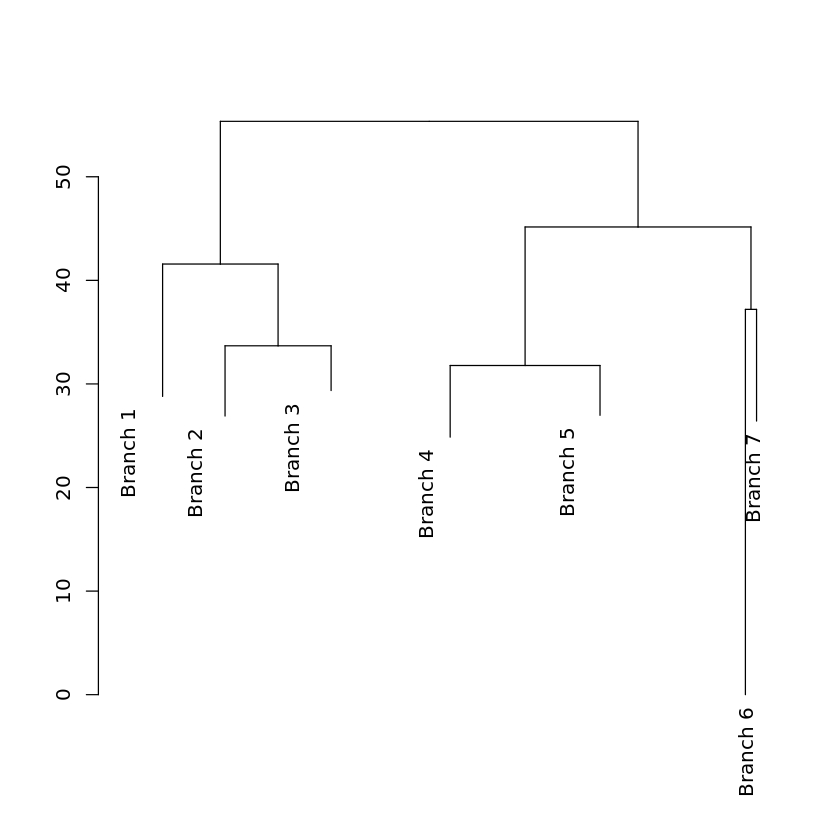

In [16]:
d <- dist(as.matrix(genNum_norm),method = "euclidean")
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
plot(cut(hcd,h=30)$upper)

In [17]:
table(genNumWork$clasif,cutree(hc,4))

         
           1  2  3  4
  Cancer. 24  1  1 17
  Normal. 19  2  8 14

### Parte 3

Realizar un PCA, quedarse con los dos valores más representativos. Pintarlo en una nube de puntos donde los tejidos normales tendrán un color y los tejidos con cancer otro.

A partir de esta representación simplificada (con solo 2 valores más significativos) crear un modelo de regresión logística. Compara la curva ROC de este nuevo modelo con el de la *Parte 1*

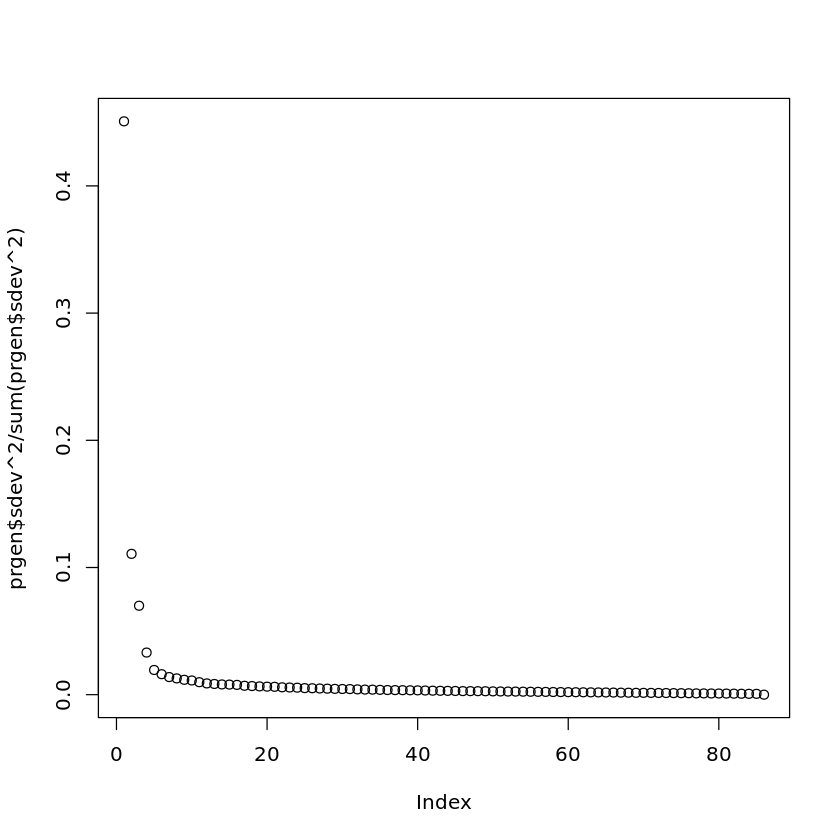

In [18]:
prgen<-prcomp(genNum_norm,center = FALSE, scale. = FALSE)

plot(prgen$sdev^2/sum(prgen$sdev^2))


         
           1  2
  Cancer. 24 19
  Normal. 20 23

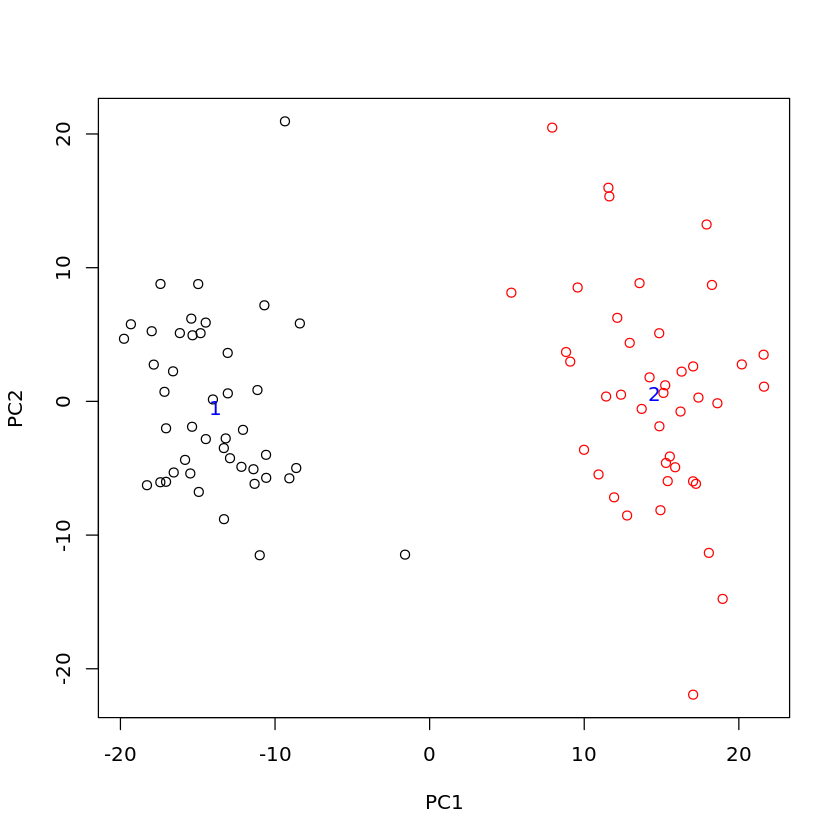

In [19]:
myclust2<-kmeans(prgen$x[,c(1:2)],2)
plot(prgen$x[,c(1,2)],col=myclust2$cluster)
text(x=myclust2$centers[,1],y=myclust2$centers[,2],
     cex=1, labels=(1:nrow(myclust2$centers)),col="blue")

table(genNumWork$clasif, myclust2$cluster)

In [20]:
pr_data<-as.data.frame(prgen$x[,1:2])

pr_data$clasif<-genNumWork$clasif
pr_data$clasif.n<-genNumWork$clasif.n

idx<-sample(1:nrow(pr_data),nrow(pr_data)*0.7)
pr.train<-pr_data[idx,]
pr.test<-pr_data[-idx,]

In [21]:
modelPr<- glm(clasif.n~.,data=pr.train,family = binomial(link='logit'))

y_predict <- predict(modelPr, pr.test)
y_factor<-as.factor(ifelse(y_predict<0,"Cancer","Normal"))

table(y_factor,pr.test$clasif)

        
y_factor Cancer. Normal.
  Cancer      11       0
  Normal       0      15

Warning message:
"Removed 1 rows containing missing values (geom_path)."

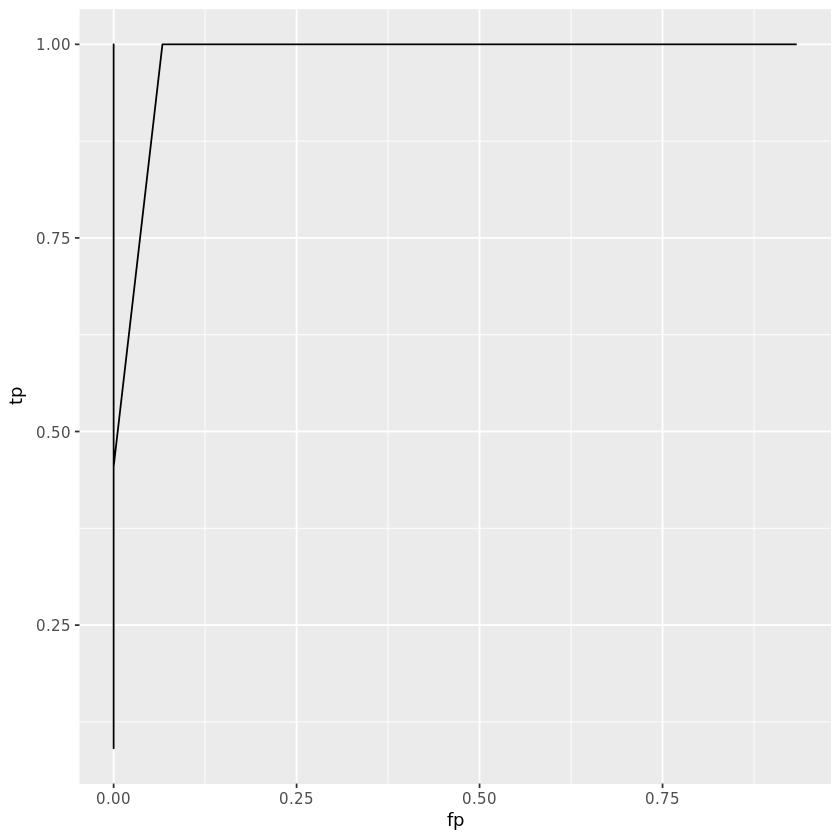

In [22]:
calctp_fp<-function(y_predict,y_real,th){
    y_est<-ifelse(y_predict<th,0,1)
    idx_normal<-y_real==1
    idx_cancer <-y_real==0

    M<-table(y_est,pr.test$clasif.n)
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}

y_predict<-predict(modelPr,pr.test)
dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="model1")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,pr.test$clasif.n,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}

dfROC<-dfROC[order(dfROC$fp),]

library(ggplot2)
ggplot(data=dfROC,aes(x=fp,y=tp))+geom_path()

En comparación con la otra curva ROC, en esta ocasión prácticamente está garantizado el verdadero positivo.